In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Nesse notebook procurei brincar um pouco para trazer alguns insights sobre os dados fornecidos pelo Johns Hopkins.

> Premissas

* Aqui busquei analisar apenas 3 paises, para facilitar a briancadeira um pouco e focar os insights.
* Trago dois graficos
    - Gráfico de taxa de trasmissão (research_r0-camada)
    - Médias moveis (camada-refined)
* Alguns bullet points e analises sobre ambos.

#### Read -> little adust -> Plot [R0]

In [38]:
parquet_path = "/home/gabrielphilot/cases/radix/desafio-data-engineer/datalake/research_r0/covid19"

# Ler os dados do Parquet
df_weekly_r0 = pd.read_parquet(parquet_path)

# Filtrar os dados para os países sample da analise
countries = ["Italy", "Brazil", "Mexico"]
countries = ["Italy", "Brazil", "Mexico"]
df_filtered_r0 = df_weekly_r0[df_weekly_r0['pais'].isin(countries)].copy()

# Converter a coluna de semana para o tipo datetime
df_filtered_r0.loc[:, 'semana'] = pd.to_datetime(df_filtered_r0['semana'])

# Mostrar as primeiras linhas do DataFrame
df_filtered_r0.head()

,pais,semana,casos_semana,casos_semana_anterior,R0_semanal,ano
3250,Brazil,2020-01-20,0,NaN,NaN,2020
3251,Brazil,2020-01-27,0,0.0,NaN,2020
3252,Brazil,2020-02-03,0,0.0,NaN,2020
3253,Brazil,2020-02-10,0,0.0,NaN,2020
3254,Brazil,2020-02-17,0,0.0,NaN,2020


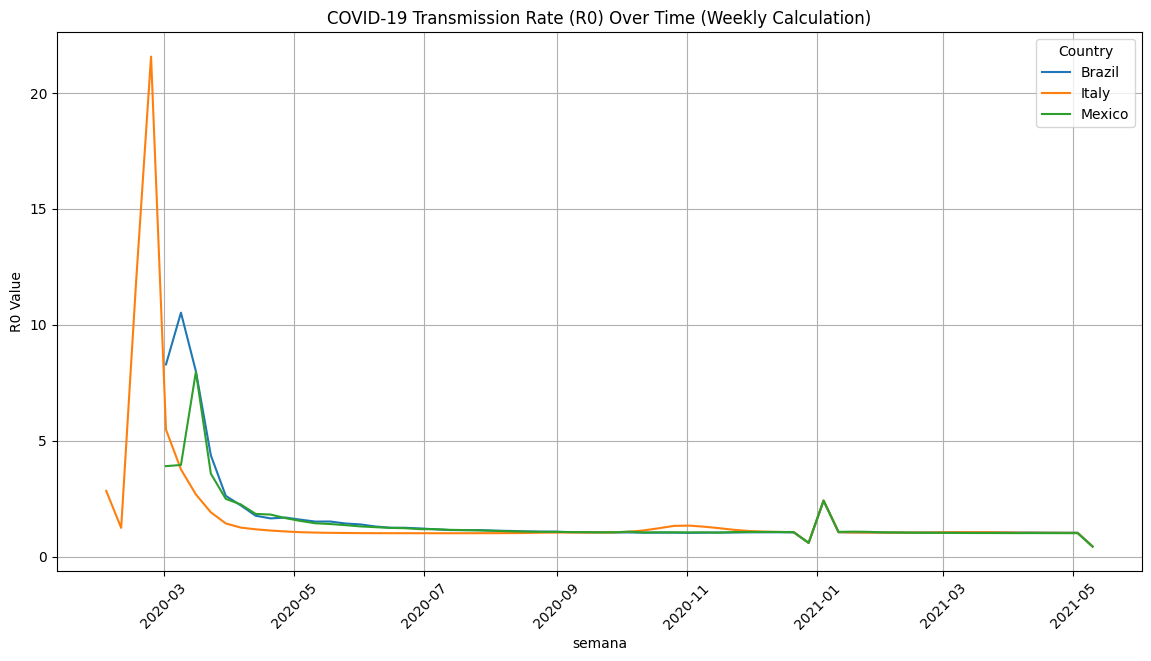

In [39]:
# Plotting
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_filtered_r0[df_filtered_r0['pais'] == 'Brazil'], x="semana", y="R0_semanal", label="Brazil")
sns.lineplot(data=df_filtered_r0[df_filtered_r0['pais'] == 'Italy'], x="semana", y="R0_semanal", label="Italy")
sns.lineplot(data=df_filtered_r0[df_filtered_r0['pais'] == 'Mexico'], x="semana", y="R0_semanal", label="Mexico")
#plt.yscale('log')
plt.title("COVID-19 Transmission Rate (R0) Over Time (Weekly Calculation)")
plt.xlabel("semana")
plt.ylabel("R0 Value")
plt.xticks(rotation=45)
plt.legend(title="Country")
plt.grid(True)
plt.show()

#### Read -> litle adust -> Plot [Moving average]

In [33]:
parquet_path = "/home/gabrielphilot/cases/radix/desafio-data-engineer/datalake/refined/covid19"

# Ler os dados do Parquet
df_moving_a = pd.read_parquet(parquet_path)

# Filtrar os dados para os países sample da analise
countries = ["Italy", "Brazil", "Mexico"]
countries = ["Italy", "Brazil", "Mexico"]
df_filtered = df_moving_a[df_moving_a['pais'].isin(countries)].copy()

df_filtered['data'] = pd.to_datetime(df_filtered['data'])

# Mostrar as primeiras linhas do DataFrame
df_filtered.head()

,pais,data,media_movel_confirmados,media_movel_mortes,media_movel_recuperados,ano
23805,Italy,2020-01-22,0,0,0.0,2020
23806,Italy,2020-01-23,0,0,0.0,2020
23807,Italy,2020-01-24,0,0,0.0,2020
23808,Italy,2020-01-25,0,0,0.0,2020
23809,Italy,2020-01-26,0,0,0.0,2020


In [35]:
df_filtered['semana'] = df_filtered['data'].dt.to_period('W').apply(lambda r: r.start_time)

df_weekly_avg = df_filtered.groupby(['pais', 'semana']).agg({
    'media_movel_confirmados': 'mean',
}).reset_index()

df_weekly_avg.head()

,pais,semana,media_movel_confirmados
0,Brazil,2020-01-20,0.0
1,Brazil,2020-01-27,0.0
2,Brazil,2020-02-03,0.0
3,Brazil,2020-02-10,0.0
4,Brazil,2020-02-17,0.0


In [44]:
# print("Verificar valores de 'media_movel_confirmados' após o agrupamento:")
# print(df_weekly_avg[['media_movel_confirmados']].describe())

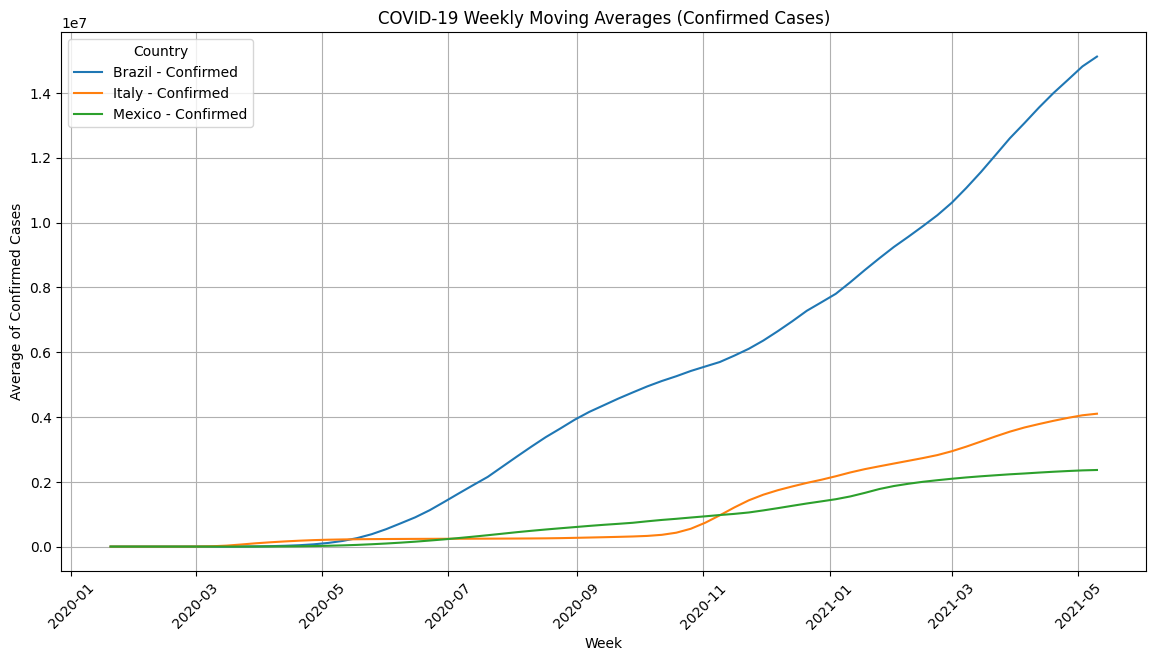

In [41]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_weekly_avg[df_weekly_avg['pais'] == 'Brazil'], x="semana", y="media_movel_confirmados", label="Brazil - Confirmed")
sns.lineplot(data=df_weekly_avg[df_weekly_avg['pais'] == 'Italy'], x="semana", y="media_movel_confirmados", label="Italy - Confirmed")
sns.lineplot(data=df_weekly_avg[df_weekly_avg['pais'] == 'Mexico'], x="semana", y="media_movel_confirmados", label="Mexico - Confirmed")
plt.title("COVID-19 Weekly Moving Averages (Confirmed Cases)")
plt.xlabel("Week")
plt.ylabel("Average of Confirmed Cases")
plt.xticks(rotation=45)
plt.legend(title="Country")
plt.grid(True)
plt.show()

### Insights

##### Taxa de Transmissão (R0)¹ e Média Móvel de Casos Confirmados

* Brasil
    - R0 apresentou picos altos no incio (ambos os 3 tiveram esse padrão) da pandemia, mas estabilizou para 1 em torno de alguns meses.
    - A média movel de casos confirmados continuou a subir mesmo com R0 estável.
    - Com ambas as métricas, podemos sugerir que mesmo com medidas de controle, a grande parte da população mantiveram um número absoluto alto de novas infecções.

* Italia
    - R0 também alto, declinio rápido para 1.
    - Média movel teve um crescimento mais moderado em relação ao Brasil.
    
* México
    - R0 também alto, declinio mais parecido com o Brasil para 1.
    - Menor média móvel entre os três países, sugerindo uma disseminação mais lenta e talvez menos densa.
    - A estabilização de R0 combinada com uma população menor contribuiu para um menor crescimento absoluto de casos.

* Dinâmica entre R0 e Média Móvel
    - Variações Regionais e Temporais:
        * R0 pode variar entre diferentes regiões e ao longo do tempo, resultando em uma média do país estavel,
        porem com valores regionais distintos.
        * Cada região também podem sofrer de surtos em momentos diferentes, contribuindo para um crescimento continuo
        na média movel.
    - Dados sujos
        * Possiveis "escondidinhas" iniciais e correções podem influenciar nessa dinamica entre R0 e média móvel de casos confirmados.
    - Impacto das Medidas de Controle:
        * A eficacia e consistencia (pico de 2021) das medidas de controle, como lockdowns, uso de mascaras e distanciamento, impactaram
        diretamente R0 e a média móvel de novos casos.
    - Vacinação e Imunidade
        * A intrudução das vacineas e a imunidade adquirida ao longo do tempo, ajudaram a reduzir R0 e controlar a propagação (creio que se fizesse uma analise
        para os dados de morte aqui seria drasticamente mais expressivo).



### R0¹

R0(t) = Ct/Ct-1

- Ct -> n# casos no dia t.
- Ct-1 -> n# casos t-1


R0 e Crescimento Exponencial:

* R0 > 1, a infecção se espalha de forma exponencial.
* R0 = 1, 1, a infecção se espalha de forma linear.
* R0 < 1, a infecção diminui.
